<a href="https://colab.research.google.com/github/WillSAdkins/MSc_project_EEG/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
import string
import numpy as np
#!pip install tensorflow
#import tensorflow as tf
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
# !pip install keras
from keras.models import Sequential,load_model
from keras.layers import Dense, advanced_activations, Dropout, LSTM, GRU, Embedding, SimpleRNN, Conv2D, Flatten
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import ImageDataGenerator
!pip install tqdm
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import glob
#import cv2
import gc
!pip install mne
import mne
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time
import pickle
from mne.preprocessing import create_ecg_epochs



def save_model_json(model, filename):
    # serialize model to JSON
    model_json = model.to_json()
    with open(f"{filename}.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f"{filename}.h5")
    print(f"Saved {filename} to disk")



def load_model_json(filename):
    # load json and create model
    json_file = open(f'{filename}.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(f"{filename}.h5")
    print(f"Loaded {filename} from disk")
    return loaded_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Handle data

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
dir_path = "/content/drive/MyDrive/Bath/Dissertation/Analysis/Participants/"
participant = '01'
with ZipFile(dir_path + participant + '/' + 'recordings.zip', 'r') as zip_file:
    print(zip_file)
    print(zip_file.printdir())
    zip_file.extractall()

speaking1 = pd.read_csv('Labelled/speaking1_labelled.csv')
speaking2 = pd.read_csv('Labelled/speaking2_labelled.csv')
speaking3 = pd.read_csv('Labelled/speaking3_labelled.csv')
speaking4 = pd.read_csv('Labelled/speaking4_labelled.csv')
speaking5 = pd.read_csv('Labelled/speaking5_labelled.csv')
speaking6 = pd.read_csv('Labelled/speaking6_labelled.csv')
speaking7 = pd.read_csv('Labelled/speaking7_labelled.csv')
speaking8 = pd.read_csv('Labelled/speaking8_labelled.csv')
speaking9 = pd.read_csv('Labelled/speaking9_labelled.csv')
speaking10 = pd.read_csv('Labelled/speaking10_labelled.csv')
stimuli = pd.read_csv('Labelled/stimuli_labelled.csv')

<zipfile.ZipFile filename='/content/drive/MyDrive/Bath/Dissertation/Analysis/Participants/01/recordings.zip' mode='r'>
File Name                                             Modified             Size
Labelled/speaking1_labelled.csv                2022-08-09 10:30:24     19067828
Labelled/speaking10_labelled.csv               2022-08-09 10:30:24     19132455
Labelled/speaking2_labelled.csv                2022-08-09 10:30:22     19061873
Labelled/speaking3_labelled.csv                2022-08-09 10:30:24     19065835
Labelled/speaking4_labelled.csv                2022-08-09 10:30:26     19057326
Labelled/speaking5_labelled.csv                2022-08-09 10:30:22     19070853
Labelled/speaking6_labelled.csv                2022-08-09 10:30:22     19072968
Labelled/speaking7_labelled.csv                2022-08-09 10:30:24     19059163
Labelled/speaking8_labelled.csv                2022-08-09 10:30:24     19065273
Labelled/speaking9_labelled.csv                2022-08-09 10:30:26     19065750
L

In [61]:
speaking1

,Time:256Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Channel 15,Channel 16,Label,Mode of Stimulus,Stage
0,23.000000,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
1,23.003906,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
2,23.007812,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
3,23.011719,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
4,23.015625,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66555,4485.980469,129,4235.512695,4197.948730,4196.666504,4196.666504,4229.102539,4232.948730,4245.897461,4186.282227,...,4196.538574,4256.794922,4228.077148,4211.025879,4170.897461,4236.666504,4197.179688,Clock,text,speaking1
66556,4485.984375,129,4235.512695,4197.948730,4196.666504,4196.666504,4229.102539,4232.948730,4245.897461,4186.282227,...,4196.538574,4256.794922,4228.077148,4211.025879,4170.897461,4236.666504,4197.179688,Clock,text,speaking1
66557,4485.988281,129,4235.512695,4197.948730,4196.666504,4196.666504,4229.102539,4232.948730,4245.897461,4186.282227,...,4196.538574,4256.794922,4228.077148,4211.025879,4170.897461,4236.666504,4197.179688,Clock,text,speaking1
66558,4485.992188,129,4235.512695,4197.948730,4196.666504,4196.666504,4229.102539,4232.948730,4245.897461,4186.282227,...,4196.538574,4256.794922,4228.077148,4211.025879,4170.897461,4236.666504,4197.179688,Clock,text,speaking1


In [62]:
stimuli

,Time:256Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Channel 15,Channel 16,Label,Mode of Stimulus,Stage
0,20.000000,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
1,20.003906,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
2,20.007812,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
3,20.011719,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
4,20.015625,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66555,4482.980469,129,4248.589844,4264.102539,4267.051270,4231.025879,4258.717773,4251.282227,4262.051270,4260.128418,...,4263.589844,4248.846191,4295.000000,4230.512695,4262.051270,4248.589844,4263.717773,Clock,text,stimuli
66556,4482.984375,129,4248.589844,4264.102539,4267.051270,4231.025879,4258.717773,4251.282227,4262.051270,4260.128418,...,4263.589844,4248.846191,4295.000000,4230.512695,4262.051270,4248.589844,4263.717773,Clock,text,stimuli
66557,4482.988281,129,4248.589844,4264.102539,4267.051270,4231.025879,4258.717773,4251.282227,4262.051270,4260.128418,...,4263.589844,4248.846191,4295.000000,4230.512695,4262.051270,4248.589844,4263.717773,Clock,text,stimuli
66558,4482.992188,129,4248.589844,4264.102539,4267.051270,4231.025879,4258.717773,4251.282227,4262.051270,4260.128418,...,4263.589844,4248.846191,4295.000000,4230.512695,4262.051270,4248.589844,4263.717773,Clock,text,stimuli


In [63]:
print(speaking1['Label'].unique())
print(speaking1['Mode of Stimulus'].unique())

['Lamp' 'Ambulance' 'Clock' 'Rest' 'Hospital']
['audio' 'image' 'text' 'None']


In [64]:
speaking1.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 16', 'Channel 15', 'Label', 'Mode of Stimulus']).to_numpy().reshape(130, 512 * 14).shape

(130, 7168)

In [65]:
speaking1.shape

(66560, 21)

In [66]:
speaking = pd.concat([speaking1, speaking2, speaking3, speaking4, speaking5, speaking6, speaking7, speaking8, speaking9, speaking10], axis = 0)

In [67]:
14*512

7168

In [68]:
speaking1[speaking1['Epoch'] == 0]

,Time:256Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Channel 15,Channel 16,Label,Mode of Stimulus,Stage
0,23.000000,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
1,23.003906,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
2,23.007812,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
3,23.011719,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
4,23.015625,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,24.980469,0,4246.538574,4231.410156,4217.692383,4201.922852,4234.358887,4231.922852,4225.897461,4238.974121,...,4246.538574,4234.358887,4216.666504,4233.077148,4146.410156,4245.641113,4232.563965,Lamp,audio,speaking1
508,24.984375,0,4238.589844,4230.897461,4247.436035,4234.871582,4217.563965,4232.436035,4140.512695,4244.615234,...,4217.820312,4203.846191,4233.589844,4228.717773,4229.102539,4239.102539,4233.333496,Lamp,audio,speaking1
509,24.988281,0,4244.743652,4239.743652,4222.563965,4207.948730,4233.589844,4228.461426,4230.769043,4240.897461,...,4248.717773,4235.897461,4227.436035,4233.077148,4142.692383,4246.794922,4242.051270,Lamp,audio,speaking1
510,24.992188,0,4243.205078,4242.820312,4247.692383,4235.512695,4230.384766,4234.358887,4149.230957,4249.487305,...,4232.436035,4216.666504,4235.128418,4229.358887,4229.487305,4244.358887,4245.641113,Lamp,audio,speaking1


In [69]:
speaking

,Time:256Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Channel 15,Channel 16,Label,Mode of Stimulus,Stage
0,23.000000,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
1,23.003906,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
2,23.007812,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
3,23.011719,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
4,23.015625,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66555,4503.980469,129,4245.384766,4263.589844,4286.666504,4263.333496,4245.000000,4248.974121,4206.410156,4261.410156,...,4249.871582,4261.538574,4218.589844,4260.128418,4248.461426,4243.717773,4264.358887,Clock,text,speaking10
66556,4503.984375,129,4245.384766,4263.589844,4286.666504,4263.333496,4245.000000,4248.974121,4206.410156,4261.410156,...,4249.871582,4261.538574,4218.589844,4260.128418,4248.461426,4243.717773,4264.358887,Clock,text,speaking10
66557,4503.988281,129,4245.384766,4263.589844,4286.666504,4263.333496,4245.000000,4248.974121,4206.410156,4261.410156,...,4249.871582,4261.538574,4218.589844,4260.128418,4248.461426,4243.717773,4264.358887,Clock,text,speaking10
66558,4503.992188,129,4245.384766,4263.589844,4286.666504,4263.333496,4245.000000,4248.974121,4206.410156,4261.410156,...,4249.871582,4261.538574,4218.589844,4260.128418,4248.461426,4243.717773,4264.358887,Clock,text,speaking10


In [70]:
def Handle(dataframe):
    
    features = dataframe.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 16', 'Channel 15', 'Label', 'Mode of Stimulus']).to_numpy().reshape(dataframe.shape[0] // (512), 512 * 14)
    targets = dataframe['Label'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    modes_of_stimuli = dataframe['Mode of Stimulus'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    return features, targets, modes_of_stimuli
features, targets, modes_of_stimuli = Handle(speaking)
stimuli_features, stimuli_targets, modes_of_stimuli_stimstage = Handle(stimuli)
pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9,...,7158,7159,7160,7161,7162,7163,7164,7165,7166,7167
0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,4250.128418,4242.307617,...,4236.153809,4229.230957,4225.769043,4242.948730,4244.871582,4245.128418,4234.358887,4223.846191,4234.743652,4153.077148
1,4246.282227,4245.128418,4250.769043,4232.179688,4230.128418,4233.717773,4136.922852,4260.128418,4251.410156,4235.641113,...,4251.410156,4250.769043,4189.743652,4279.487305,4247.692383,4250.769043,4246.538574,4249.615234,4246.025879,4246.794922
2,4248.461426,4245.000000,4233.717773,4200.512695,4186.282227,4217.051270,4106.538574,4247.948730,4259.871582,4246.282227,...,4286.410156,4241.794922,4102.692383,4250.000000,4233.461426,4234.743652,4231.025879,4234.615234,4227.948730,4241.153809
3,4245.256348,4246.282227,4251.025879,4262.692383,4281.410156,4243.077148,4138.974121,4234.615234,4234.487305,4249.871582,...,4261.666504,4234.615234,4118.589844,4248.205078,4247.692383,4257.948730,4357.179688,4246.282227,4246.025879,4240.000000
4,4242.820312,4245.256348,4245.769043,4259.230957,4386.282227,4247.948730,4135.128418,4233.974121,4257.948730,4249.102539,...,4203.717773,4245.384766,4141.794922,4268.205078,4262.051270,4264.102539,4267.563965,4244.487305,4263.077148,4266.410156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,4243.461426,4250.769043,4245.256348,4247.436035,4232.436035,4235.128418,4229.871582,4247.820312,4245.769043,4234.230957,...,4247.307617,4250.512695,4216.025879,4233.589844,4232.307617,4232.692383,4236.410156,4227.820312,4217.692383,4225.384766
1296,4231.794922,4232.436035,4232.563965,4235.256348,4232.307617,4216.666504,4220.512695,4239.615234,4243.846191,4232.948730,...,4248.461426,4240.384766,4168.974121,4249.487305,4233.846191,4266.538574,4264.871582,4234.615234,4229.871582,4239.743652
1297,4245.897461,4261.538574,4260.384766,4252.179688,4247.179688,4251.282227,4281.538574,4249.358887,4257.820312,4243.846191,...,4232.948730,4230.000000,4231.282227,4239.615234,4237.436035,4239.743652,4247.051270,4236.922852,4242.692383,4284.743652
1298,4244.743652,4244.102539,4246.538574,4244.230957,4242.051270,4238.077148,4204.230957,4247.820312,4244.102539,4233.205078,...,4214.230957,4247.179688,4216.538574,4245.641113,4245.512695,4245.384766,4230.769043,4245.000000,4249.487305,4199.358887


In [71]:
pd.DataFrame(targets)

,0
0,Lamp
1,Ambulance
2,Ambulance
3,Clock
4,Ambulance
...,...
1295,Lamp
1296,Hospital
1297,Rest
1298,Clock


In [72]:
pd.DataFrame(modes_of_stimuli)

,0
0,audio
1,image
2,image
3,audio
4,text
...,...
1295,image
1296,audio
1297,None
1298,image


In [73]:
pd.DataFrame(stimuli_features)

,0,1,2,3,4,5,6,7,8,9,...,7158,7159,7160,7161,7162,7163,7164,7165,7166,7167
0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,4248.461426,4248.589844,...,4238.333496,4231.922852,4230.128418,4232.948730,4245.128418,4220.769043,4298.461426,4215.641113,4233.077148,4156.153809
1,4263.717773,4252.563965,4260.256348,4261.282227,4262.692383,4245.897461,4127.563965,4255.897461,4251.538574,4247.948730,...,4182.692383,4217.307617,4123.461426,4244.871582,4252.436035,4233.846191,4281.794922,4246.410156,4232.436035,4230.897461
2,4248.974121,4250.769043,4260.769043,4248.333496,4246.666504,4232.179688,4124.230957,4201.538574,4235.000000,4231.794922,...,4260.384766,4231.025879,4124.230957,4249.615234,4240.384766,4248.846191,4258.846191,4234.871582,4228.205078,4231.666504
3,4237.563965,4241.666504,4244.230957,4254.487305,4272.820312,4250.641113,4155.256348,4230.256348,4239.871582,4232.820312,...,4237.820312,4249.487305,4250.000000,4235.769043,4260.897461,4275.769043,4284.743652,4292.820312,4262.563965,4144.487305
4,4243.974121,4258.717773,4261.153809,4263.974121,4280.897461,4246.282227,4121.410156,4249.487305,4271.922852,4257.820312,...,4256.282227,4244.358887,4120.769043,4233.077148,4252.948730,4250.128418,4203.205078,4232.051270,4231.538574,4233.974121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,4248.974121,4299.358887,4283.205078,4269.102539,4226.153809,4242.307617,4230.384766,4270.769043,4262.563965,4264.487305,...,4227.820312,4241.794922,4261.922852,4243.333496,4248.974121,4231.282227,4232.307617,4229.102539,4166.666504,4215.128418
126,4244.871582,4292.948730,4291.794922,4277.820312,4252.051270,4240.384766,4140.897461,4276.922852,4245.897461,4319.230957,...,4263.077148,4246.282227,4248.717773,4247.179688,4263.461426,4276.538574,4283.974121,4257.948730,4243.205078,4161.153809
127,4276.922852,4258.205078,4243.974121,4214.743652,4251.922852,4214.487305,4264.615234,4244.615234,4298.974121,4300.897461,...,4240.769043,4248.461426,4173.846191,4262.051270,4262.692383,4252.820312,4222.436035,4268.974121,4211.025879,4294.487305
128,4246.025879,4261.410156,4263.077148,4250.384766,4251.794922,4245.000000,4243.974121,4250.000000,4258.717773,4185.641113,...,4249.230957,4246.922852,4237.563965,4233.077148,4231.794922,4276.153809,4238.205078,4245.641113,4240.384766,4239.615234


# MNE work (Preprocessing)

{'F3': array([-0.04908182,  0.06114545,  0.04584545]), 'F4': array([0.04908182, 0.06114545, 0.04584545]), 'O1': array([-0.02809091, -0.08646364,  0.        ]), 'O2': array([ 0.02809091, -0.08646364,  0.        ]), 'F7': array([-0.07354545,  0.05343636,  0.        ]), 'F8': array([0.07354545, 0.05343636, 0.        ]), 'T7': array([-0.09090909,  0.        ,  0.        ]), 'T8': array([0.09090909, 0.        , 0.        ]), 'P7': array([-7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'P8': array([ 7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'FC5': array([-0.07917273,  0.03066364,  0.03226364]), 'FC6': array([0.07917273, 0.03066364, 0.03226364]), 'AF3': array([-0.03636364,  0.08181818,  0.03909091]), 'AF4': array([0.03636364, 0.08181818, 0.03909091])}


<ipython-input-75-a1a49a96b6ab>:9: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  montage.plot()


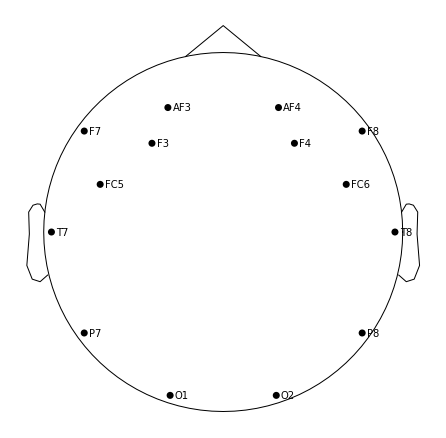

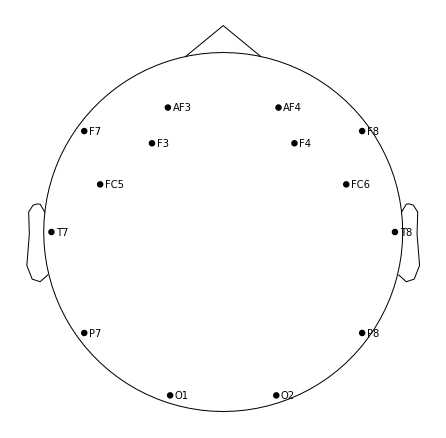

In [75]:

df = pd.read_csv('/content/drive/MyDrive/Bath/Dissertation/Analysis/channels_positional_Emotiv14.txt')
ch_names = df.name.to_list()

pos = df[['x','y','z']].values/11 # Scale down to size
dig_ch_pos = dict(zip(ch_names,pos))
print(dig_ch_pos)
montage = mne.channels.make_dig_montage(ch_pos=dig_ch_pos)
montage.plot()

In [76]:
stimuli

,Time:256Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Channel 15,Channel 16,Label,Mode of Stimulus,Stage
0,20.000000,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
1,20.003906,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
2,20.007812,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
3,20.011719,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
4,20.015625,0,4247.179688,4245.000000,4249.230957,4250.769043,4249.487305,4235.000000,4173.205078,4246.025879,...,4248.589844,4240.000000,4248.974121,4232.307617,4234.358887,4247.307617,4244.871582,Lamp,audio,stimuli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66555,4482.980469,129,4248.589844,4264.102539,4267.051270,4231.025879,4258.717773,4251.282227,4262.051270,4260.128418,...,4263.589844,4248.846191,4295.000000,4230.512695,4262.051270,4248.589844,4263.717773,Clock,text,stimuli
66556,4482.984375,129,4248.589844,4264.102539,4267.051270,4231.025879,4258.717773,4251.282227,4262.051270,4260.128418,...,4263.589844,4248.846191,4295.000000,4230.512695,4262.051270,4248.589844,4263.717773,Clock,text,stimuli
66557,4482.988281,129,4248.589844,4264.102539,4267.051270,4231.025879,4258.717773,4251.282227,4262.051270,4260.128418,...,4263.589844,4248.846191,4295.000000,4230.512695,4262.051270,4248.589844,4263.717773,Clock,text,stimuli
66558,4482.992188,129,4248.589844,4264.102539,4267.051270,4231.025879,4258.717773,4251.282227,4262.051270,4260.128418,...,4263.589844,4248.846191,4295.000000,4230.512695,4262.051270,4248.589844,4263.717773,Clock,text,stimuli


In [77]:
speaking

,Time:256Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Channel 15,Channel 16,Label,Mode of Stimulus,Stage
0,23.000000,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
1,23.003906,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
2,23.007812,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
3,23.011719,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
4,23.015625,0,4249.487305,4254.743652,4278.461426,4266.282227,4245.641113,4269.487305,4163.077148,4251.538574,...,4242.307617,4261.410156,4247.820312,4252.948730,4236.922852,4248.077148,4256.410156,Lamp,audio,speaking1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66555,4503.980469,129,4245.384766,4263.589844,4286.666504,4263.333496,4245.000000,4248.974121,4206.410156,4261.410156,...,4249.871582,4261.538574,4218.589844,4260.128418,4248.461426,4243.717773,4264.358887,Clock,text,speaking10
66556,4503.984375,129,4245.384766,4263.589844,4286.666504,4263.333496,4245.000000,4248.974121,4206.410156,4261.410156,...,4249.871582,4261.538574,4218.589844,4260.128418,4248.461426,4243.717773,4264.358887,Clock,text,speaking10
66557,4503.988281,129,4245.384766,4263.589844,4286.666504,4263.333496,4245.000000,4248.974121,4206.410156,4261.410156,...,4249.871582,4261.538574,4218.589844,4260.128418,4248.461426,4243.717773,4264.358887,Clock,text,speaking10
66558,4503.992188,129,4245.384766,4263.589844,4286.666504,4263.333496,4245.000000,4248.974121,4206.410156,4261.410156,...,4249.871582,4261.538574,4218.589844,4260.128418,4248.461426,4243.717773,4264.358887,Clock,text,speaking10


In [78]:
speaking_mne = speaking.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 16', 'Channel 15', 'Mode of Stimulus', 'Label'])

In [79]:
sfreq = 256
ch_names = list(speaking_mne.columns)
print(ch_names)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = 'eeg')
raw_speaking = mne.io.RawArray(speaking_mne[ch_names].transpose(), info)
raw_speaking.set_montage(montage)
raw_speaking.info
#raw_stimuli.plot()

['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']
Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


<ipython-input-79-71ece9cba16e>:6: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw_speaking.set_montage(montage)


<Info | 8 non-empty values
 bads: []
 ch_names: F3, FC5, AF3, F7, T7, P7, O1, O2, P8, T8, F8, AF4, FC6, F4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 14 items (14 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


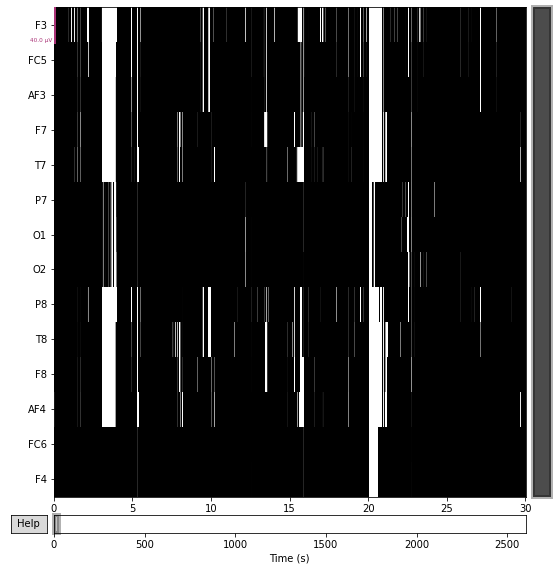

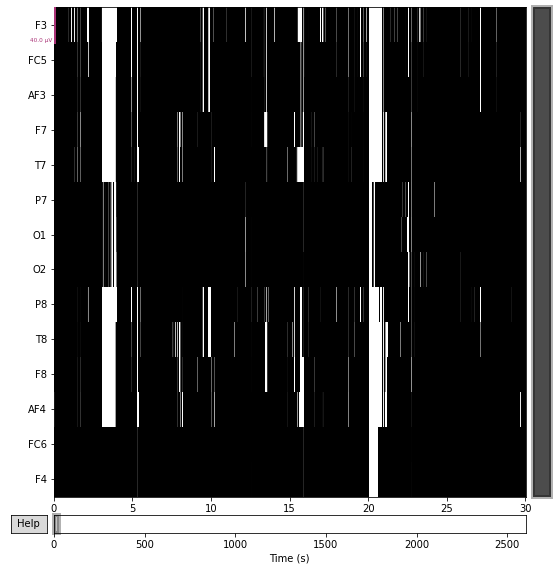

In [80]:
#raw.plot_psd(fmax=128)
raw_speaking.plot(duration=30, n_channels=14)

In [81]:
ssp_projectors = raw_speaking.info['projs']
print(ssp_projectors)
raw_speaking.del_proj()

[]


<RawArray | 14 x 665600 (2600.0 s), ~71.1 MB, data loaded>

In [ ]:
# Evoked responses



Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


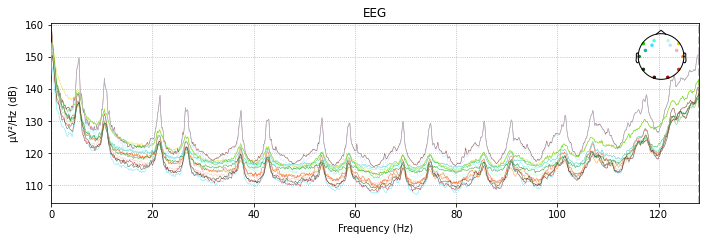

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


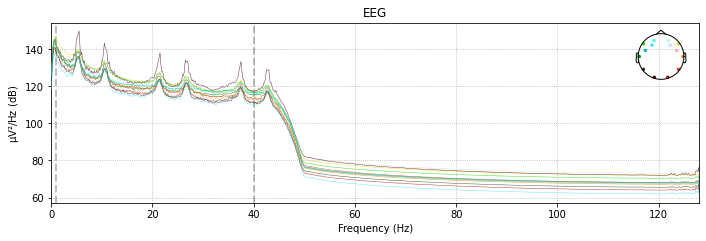

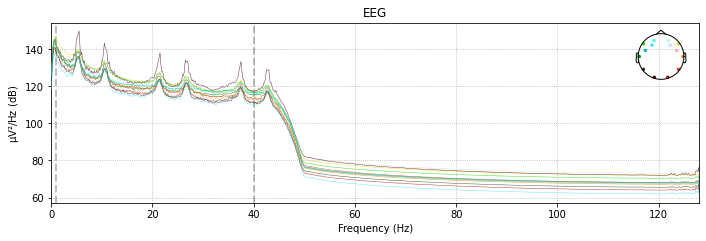

In [82]:
# High pass, Low pass filtering... think this is band pass filtering

raw_speaking.plot_psd(fmax=128)

low_cut = 1
hi_cut  = 40

raw_speaking_filt = raw_speaking.copy().filter(low_cut, hi_cut)
raw_speaking_filt.plot_psd(fmax=128)

In [26]:
# average_ecg = create_ecg_epochs(raw_speaking).average()
# print('We found %i ECG events' % average_ecg.nave)
# joint_kwargs = dict(ts_args=dict(time_unit='s'),
#                     topomap_args=dict(time_unit='s'))
# average_ecg.plot_joint(**joint_kwargs)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 14 components
Fitting ICA took 11.0s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated


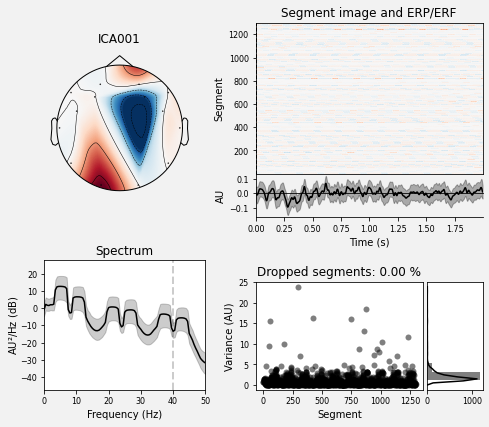

[<Figure size 504x432 with 6 Axes>]

In [109]:
ica = mne.preprocessing.ICA(max_iter=800)
ica.fit(raw_speaking_filt)
ica.exclude = [1]  # details on how we picked these are omitted here
ica.plot_properties(raw_speaking_filt, picks=ica.exclude)
#help(ica)

In [84]:
speaking_processed = raw_speaking.to_data_frame().drop(columns = ['time']).to_numpy().reshape(speaking.shape[0] // (512), 512 * 14)


In [85]:
speaking_processed

array([[4.24948730e+09, 4.25474365e+09, 4.27846143e+09, ...,
        4.22384619e+09, 4.23474365e+09, 4.15307715e+09],
       [4.24628223e+09, 4.24512842e+09, 4.25076904e+09, ...,
        4.24961523e+09, 4.24602588e+09, 4.24679492e+09],
       [4.24846143e+09, 4.24500000e+09, 4.23371777e+09, ...,
        4.23461523e+09, 4.22794873e+09, 4.24115381e+09],
       ...,
       [4.24589746e+09, 4.26153857e+09, 4.26038477e+09, ...,
        4.23692285e+09, 4.24269238e+09, 4.28474365e+09],
       [4.24474365e+09, 4.24410254e+09, 4.24653857e+09, ...,
        4.24500000e+09, 4.24948730e+09, 4.19935889e+09],
       [4.24410254e+09, 4.23166650e+09, 4.23166650e+09, ...,
        4.21858984e+09, 4.26012842e+09, 4.24846143e+09]])

In [86]:
speaking_processed.shape

(1300, 7168)

In [87]:
audio_ind = np.array(modes_of_stimuli) == 'audio'
audio_feat = features[audio_ind]
audio_targ = targets[audio_ind]

text_ind = np.array(modes_of_stimuli) == 'text'
text_feat = features[text_ind]
text_targ = targets[text_ind]

image_ind = np.array(modes_of_stimuli) == 'image'
image_feat = features[image_ind]
image_targ = targets[image_ind]

X_train, X_test, y_train, y_test = train_test_split(speaking_processed, targets)

In [88]:
stimuli_audio_ind = np.array(modes_of_stimuli_stimstage) == 'audio'
stimuli_audio_feat = stimuli_features[stimuli_audio_ind]
stimuli_audio_targ = stimuli_targets[stimuli_audio_ind]

stimuli_text_ind = np.array(modes_of_stimuli_stimstage) == 'text'
stimuli_text_feat = stimuli_features[stimuli_text_ind]
stimuli_text_targ = stimuli_targets[stimuli_text_ind]

stimuli_image_ind = np.array(modes_of_stimuli_stimstage) == 'image'
stimuli_image_feat = stimuli_features[stimuli_image_ind]
stimuli_image_targ = stimuli_targets[stimuli_image_ind]

In [89]:
X_train.shape

(975, 7168)

In [90]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train[:, None])
y_train_IE = np.argmax(y_train, axis = 1)
y_test = np.argmax(onehot_encoder.transform(y_test[:, None]), axis = 1)
#X_train = X_train.reshape(X_train.shape[0], 299 *299 * 3)
#X_test = X_test.reshape(X_test.shape[0], 299 *299 * 3)
print(X_train.shape, X_test.shape, y_train.shape, y_train_IE.shape, y_test.shape)


(975, 7168) (325, 7168) (975, 5) (975,) (325,)


In [91]:
pca = PCA(0.999)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
print(X_train.shape, X_test.shape, X_train_PCA.shape, X_test_PCA.shape)

(975, 7168) (325, 7168) (975, 842) (325, 842)


# Application of ML models

In [92]:
# ANN
# Simple DNN trained as a baseline for this problem...

In [93]:
%%time
# Train a model to classify speech...
nEpoch_DNN = 50
nBatchSize_DNN=4

DNN_simple = Sequential()
DNN_simple.add(Dense(50, input_dim= X_train_PCA.shape[1]))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dropout(0.2))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(5, input_dim = 100, activation='sigmoid'))
DNN_simple.compile(loss='categorical_crossentropy', optimizer='Adam',  metrics=['accuracy'])
DNN_simple.summary()
print(X_train.shape, y_train.shape)
simple_DNN_training = DNN_simple.fit(X_train_PCA, y_train, epochs=nEpoch_DNN, batch_size=nBatchSize_DNN)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                42150     
                                                                 
 dense_7 (Dense)             (None, 100)               5100      
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 5)                 505       
                                                                 
Total params: 67,955
Trainable params: 67,955
Non-trai

In [94]:
#Generate predictions for the simple DNN
DNN_simple_pred = np.argmax(DNN_simple.predict(X_test_PCA), axis = 1)
DNN_simple_pred
print(DNN_simple_pred[:, None].shape, y_test.shape)

#Calculate prediction accuracy...
accuracy_score(y_test, DNN_simple_pred[:, None])

(325, 1) (325,)


0.22153846153846155

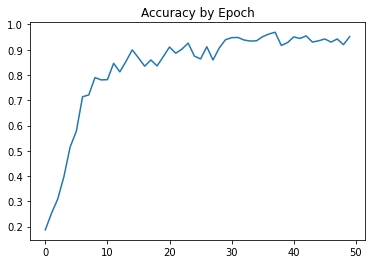

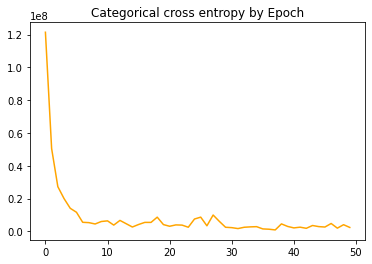

In [95]:
plt.plot(simple_DNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_DNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

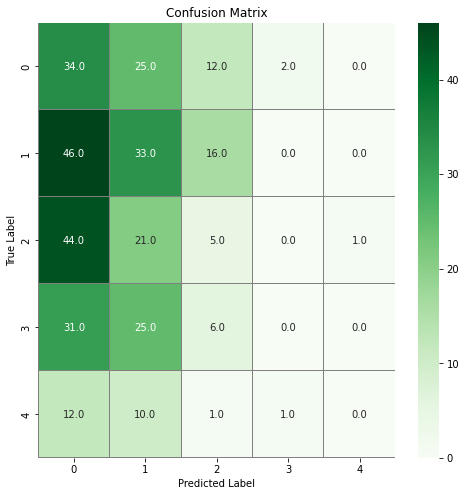

In [96]:
confusion_mtx = confusion_matrix(y_test, DNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [97]:
# # format data for input to the CNN...
X_train_CNN = X_train.reshape(X_train.shape[0], 512, 14, 1)
X_test_CNN = X_test.reshape(X_test.shape[0],512, 14, 1)
# #test_submit_set = np.array(test_submit_set).reshape(test_submit_set.shape[0], 28, 28, 1)

In [98]:
%%time
nEpoch_CNN = 100
nBatchSize_CNN = 4

CNN_simple = Sequential()
#add model layers
CNN_simple.add(Conv2D(10, kernel_size=3, activation = 'relu', input_shape=(512, 14, 1)))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Flatten())
CNN_simple.add(Dropout(0.2))
CNN_simple.add(Dense(5, activation= 'softmax'))
CNN_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
CNN_simple.summary()
simple_CNN_training = CNN_simple.fit(X_train_CNN, y_train, epochs=nEpoch_CNN, batch_size=nBatchSize_CNN)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 510, 12, 10)       100       
                                                                 
 conv2d_5 (Conv2D)           (None, 508, 10, 20)       1820      
                                                                 
 conv2d_6 (Conv2D)           (None, 506, 8, 20)        3620      
                                                                 
 conv2d_7 (Conv2D)           (None, 504, 6, 20)        3620      
                                                                 
 flatten_1 (Flatten)         (None, 60480)             0         
                                                                 
 dropout_3 (Dropout)         (None, 60480)             0         
                                                                 
 dense_11 (Dense)            (None, 5)                

In [99]:
CNN_simple_pred = np.argmax(CNN_simple.predict(X_test_CNN), axis = 1)
CNN_simple_pred
accuracy_score(y_test, CNN_simple_pred[:, None])

0.2

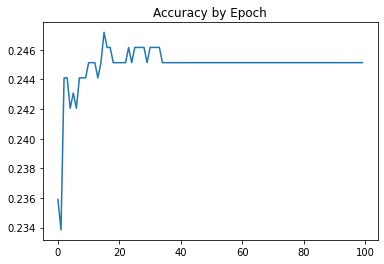

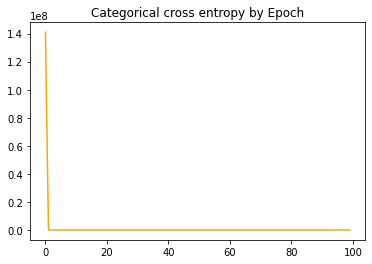

In [100]:
plt.plot(simple_CNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_CNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

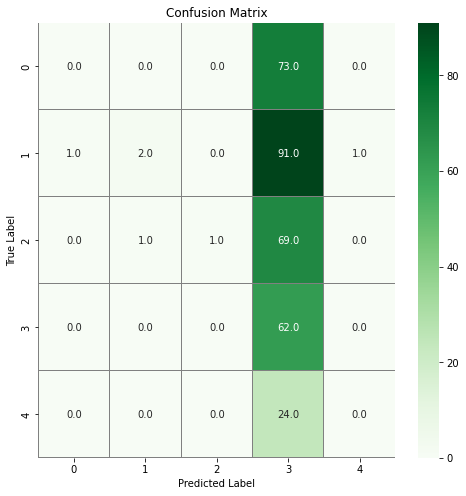

In [101]:
confusion_mtx = confusion_matrix(y_test, CNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [102]:
RF_train = True

test_perf_RF = True
#simInData_train.shape,simInData_test.shape, simOutData_train.shape, simOutData_test.shape

if RF_train:
    RF_init= RandomForestClassifier(max_depth = 100, min_samples_leaf=10)
    RF_init.fit(X_train_PCA, y_train_IE)
    pickle.dump(RF_train, open(str('RF_init'), 'wb'))
else:
    RF_init = pickle.load(open(str('RF_init'), 'rb'))


(975,) (975,)
0 0
0.9251282051282051
0.24615384615384617


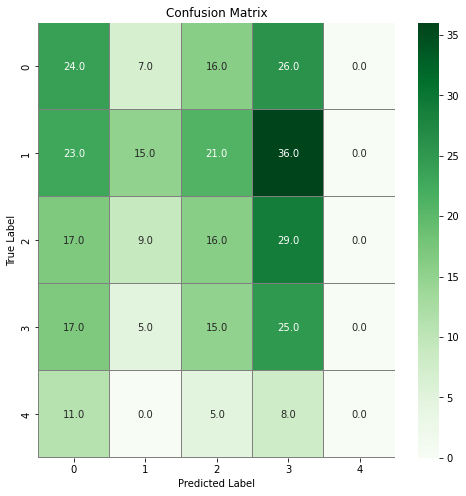

In [103]:
if test_perf_RF:
    RF_init_pred_train = (RF_init.predict(X_train_PCA))

    RF_init_pred_test = (RF_init.predict(X_test_PCA))

    #print(type(RF_toy_pred_test),simOutData_test.flatten())
    print(RF_init_pred_train.shape, y_train_IE.shape)
    print(RF_init_pred_train[0], y_train_IE[0])
    
    print(accuracy_score(RF_init_pred_train, y_train_IE))
    print(accuracy_score(RF_init_pred_test, y_test))
    confusion_mtx = confusion_matrix(y_test, RF_init_pred_test)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [104]:

# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
RF_grid = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf}
print(RF_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [105]:
# %%time
# # RF_single = RandomForestRegressor()

# # RF_single_random_search = RandomizedSearchCV(estimator = RF_single, param_distributions = RF_grid, n_iter = 50, cv = 5, verbose=2, n_jobs = -1)

# # tune_start = time.clock()

# # RF_single_random_search.fit(simInData_train, simOutData_train)

# # tune_finish = time.clock()

# # print('Total training time is ' + str(tune_finish  - tune_start) + ' seconds', RF_single_random_search.best_params_)
# # RF_single_hps = RF_single_random_search.best_params_

# RF_single = RandomForestClassifier()

# RF_single_random_search = RandomizedSearchCV(estimator = RF_single, param_distributions = RF_grid, n_iter = 50, cv = 5, verbose=2, n_jobs = -1)



# RF_single_random_search.fit(X_train_PCA, y_train_IE)


# print(RF_single_random_search.best_params_)
# RF_single_hps = RF_single_random_search.best_params_


In [106]:
# RF_single_hps

In [107]:
# (RF_single_random_search).cv_results_

In [108]:
# RF_single = RandomForestClassifier(n_estimators = RF_single_random_search.best_params_['n_estimators'],
#                                   max_depth = RF_single_hps['max_depth'],
#                                   min_samples_split = RF_single_hps['min_samples_split'],
#                                   min_samples_leaf = RF_single_hps['min_samples_leaf'])
# # t0 = time.clock()
# RF_single.fit(X_train_PCA, y_train_IE)
# # t1 = time.clock()
# # print('Total training time is ' + str(t1 - t0) + ' seconds' + ', or ' + str(
# #     float((t1 - t0) / 3600)) + f' hours, {X_train_PCA.shape[0]} training samples, {X_test_PCA.shape[0]} test samples')    
# pickle.dump(RF_single, open(str('RF_toy_single'), 'wb'))

# RF_single_pred_train = (RF_single.predict(X_train_PCA))

# RF_single_pred_test = (RF_single.predict(X_test_PCA))

# #print(type(RF_toy_pred_test),simOutData_test.flatten())
# print(accuracy_score(RF_single_pred_train, y_train_IE))
# print(accuracy_score(RF_single_pred_test, y_test))
# confusion_mtx = confusion_matrix(y_test, RF_init_pred_test)
# # plot the confusion matrix
# f,ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()